# 5. Extension

In [1]:
import sys
import numpy as np
import cv2
import torch
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader

# import previous notebook
import nbimporter
import Task2 as Note2
import Task1AE as Note1AE
import Task1FG as Note1FG

import math
from typing import Any

import torch
from torch.nn import Parameter
from torch.nn.modules import Conv2d, Module


# 1. Replace the first layer of the MNIST network with a filter bank of your choosing (e.g. Gabor filters) and retrain the rest of the network, holding the first layer constant. How does it do?

In [2]:
# 1. get gabor from opencv
filters = []
ksize = 10
for theta in np.arange(0, np.pi, np.pi / 16):
    kern = cv2.getGaborKernel((ksize, ksize), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
    kern /= 1.5*kern.sum()
    filters.append(kern)
    
# 2. convert to np then to torch object
gabor_arr = np.array(filters)
print(gabor_arr.shape)
gabor_torch = torch.from_numpy(gabor_arr)
print(gabor_torch.shape)

(16, 11, 11)
torch.Size([16, 11, 11])


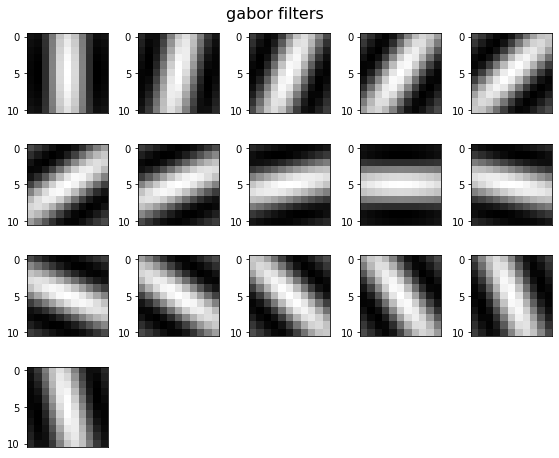

In [3]:
# 3. plot the filter
figure = plt.figure(figsize=(8, 8))
for i in range(16):
    
    # 1. Prepare grid
    plt.subplot(5, 5, i+1)
    plt.tight_layout()

    # 2. make sure the shape is 10X10 before doing imshow
    # print("shape", gabor_arr[i].shape)

    # 3. show
    figure.suptitle("gabor filters", fontsize=16)
    plt.imshow(gabor_arr[i],  cmap="gray", interpolation="none")
    plt.xticks([])

# 2. Evaluate more dimensions on task 3

# 3. Explore a different computer vision task with available data.